In [1778]:
import pandas as pd
import matplotlib.pyplot as plt

In [1779]:
def displayUnicode():
    import matplotlib
    matplotlib.rcParams['axes.unicode_minus'] = False
    fontset = set([f.name for f in matplotlib.font_manager.fontManager.ttflist])
    if 'Microsoft YaHei' in fontset:
        matplotlib.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    else:
        matplotlib.rcParams['font.sans-serif'] = ['Arial Unicode MS']


In [1780]:
def contributionPicWithLegend(df, title):
    labels = df.keys()
    sizes = df.values[0]
    total = sum(sizes)
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300

    # 白色背景
    fig1, ax1 = plt.subplots(figsize=(5, 5), facecolor='white')
    fig1.subplots_adjust(0.3, 0, 1, 1)

    ax1.pie(sizes, startangle=90, autopct='%1.1f%%')

    plt.legend(
        loc='upper left',
        labels=['%s, %1.1f%%' % (
            l, (float(s) / total) * 100)
                for l, s in zip(labels, sizes)],
        prop={'size': 11},
        bbox_to_anchor=(0.0, 1),
        bbox_transform=fig1.transFigure
    )
    plt.axis('equal')
    plt.title(title)
    plt.show()

In [1781]:
def contributionPic(df, title):
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.figure(figsize=(5, 5), facecolor='white')
    labels = df.keys()
    sizes = df.values[0]
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.axis('equal')
    plt.pie(sizes, labels=labels, autopct='%1.1f%%',  startangle=90,)
    plt.title(title)
    plt.show()

In [1782]:
def analysisPic(df):
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    plt.figure(figsize=(10, 16), facecolor='white')
    plt.ylim(0, 100)
    xlabels = df[df.keys()[0]]
    picCount = len(df.keys())
    for i in range(1, picCount):
        plt.subplot(picCount, 1,i)
        # random color
        plt.bar(xlabels, height=df[df.keys()[i]], width=0.5,color=plt.cm.Set2(i),edgecolor='#000000')
        plt.legend((df.keys()[i],), loc='upper right')
    plt.show()

In [1783]:
def stackedAreaPic(df):
    import numpy as np
    # font dpi
    plt.rcParams['font.size'] = 14
    plt.rcParams['figure.dpi'] = 300
    for i in range(1, len(df.keys())):
        df[df.keys()[i]] = df[df.keys()[i]].apply(lambda x: 0 if x < 0 else x)

    fig = plt.figure(figsize=(16, 5), facecolor='white')
    ax = fig.add_subplot(111)
    ylabels = df.keys()[1:]
    y = np.array([df[df.keys()[i]] for i in range(1,7)])
    x = df[df.keys()[0]]

    percent = y / y.sum(axis=0).astype(float) * 100 

    ax.stackplot(x, percent)

    resample = x[::24]#.append(pd.Series([x[::24].iat[-1] + pd.Timedelta(days=1)] ))
    ax.set_xticks(resample, rotation=90)
    ax.set_xticklabels(resample.apply(lambda date: date.strftime("%m/%d")).values, rotation=90)

    plt.ylabel('贡献率 (%)')
    plt.margins(0, 0) # Set margins to avoid "whitespace"
    plt.legend(ylabels,ncol=len(ylabels), loc=(0, 1.01))

    plt.show()

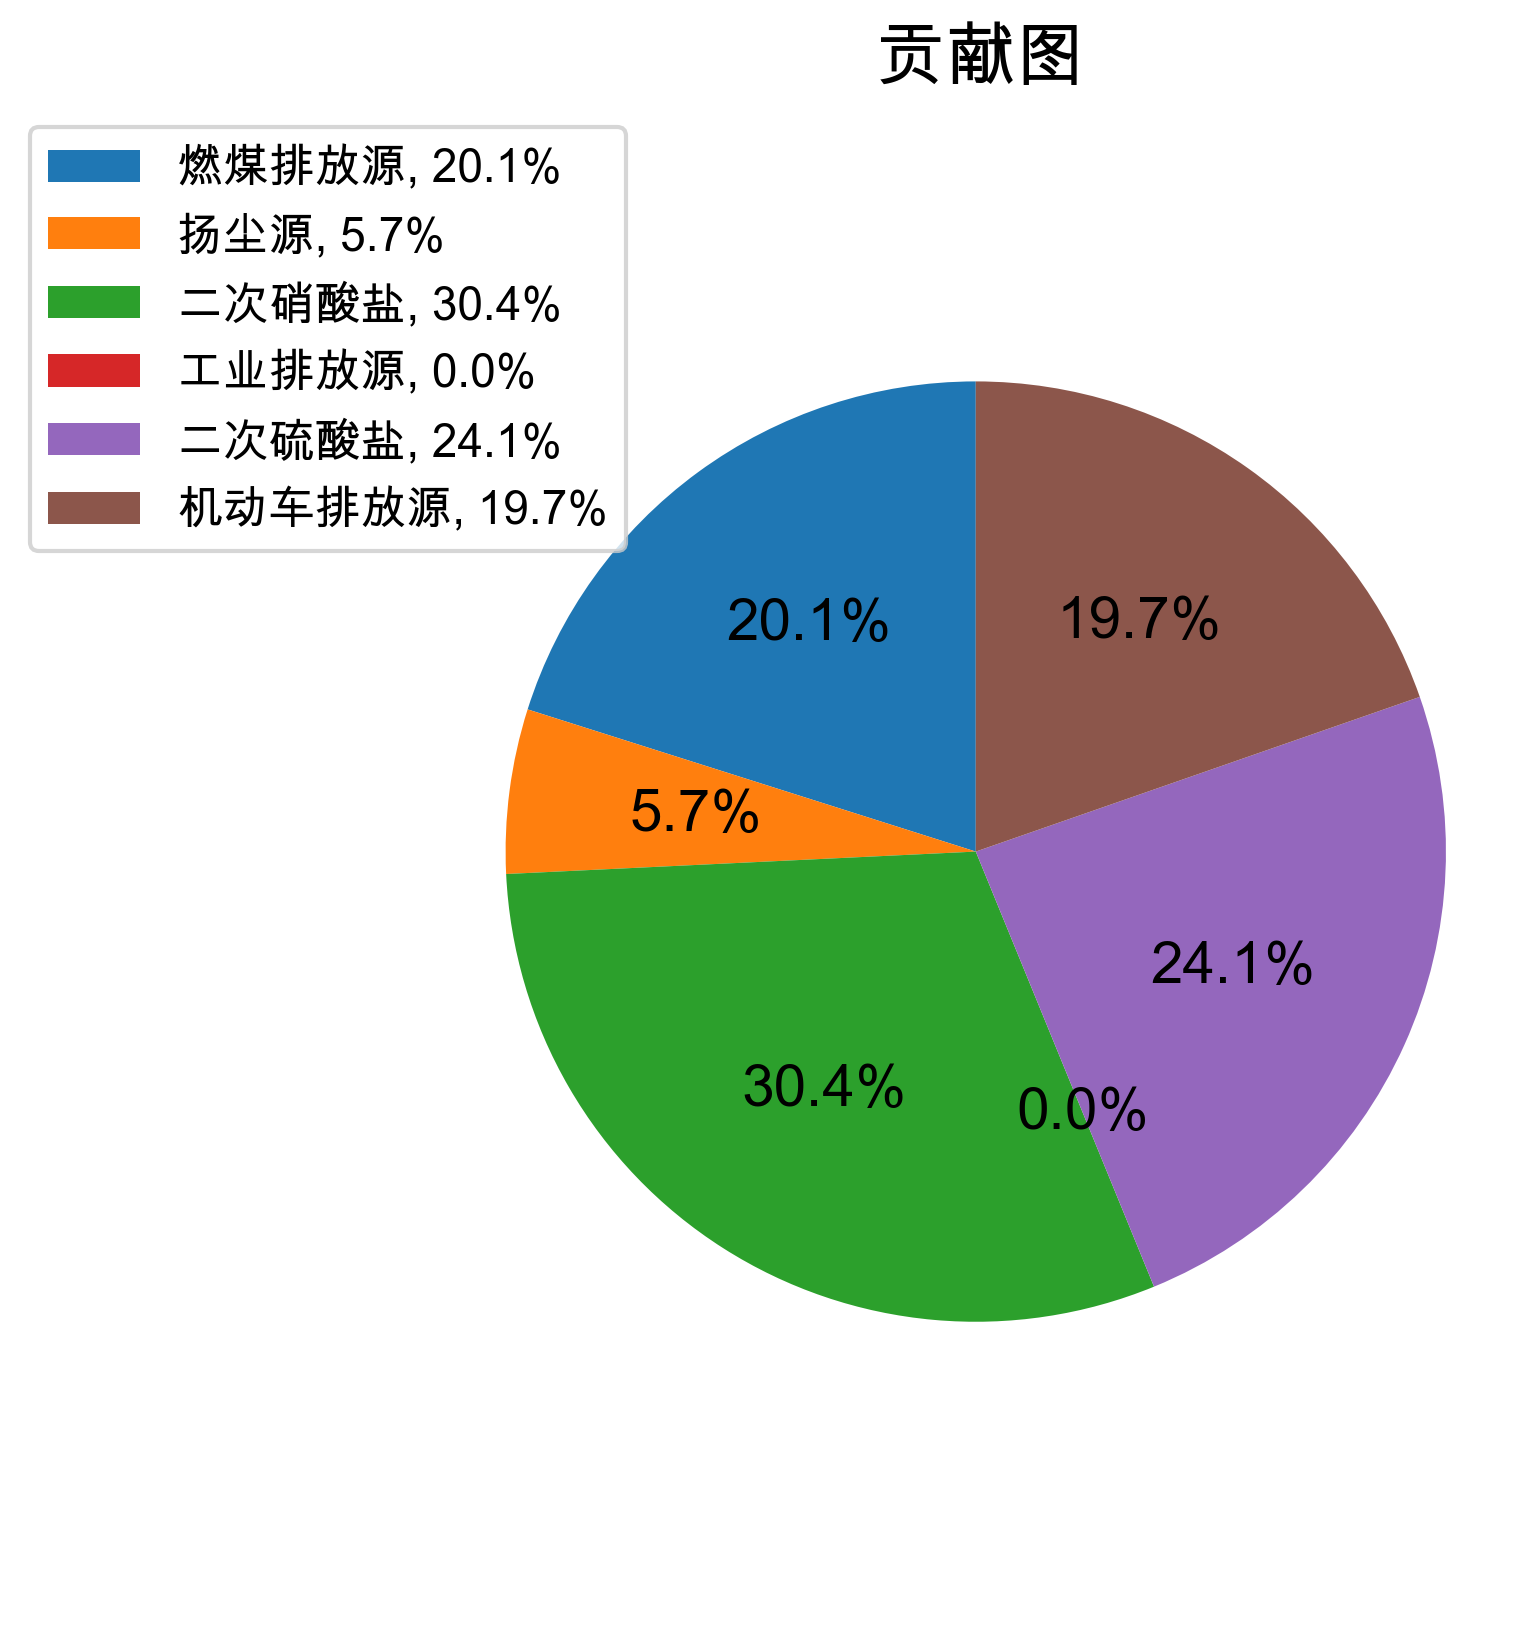

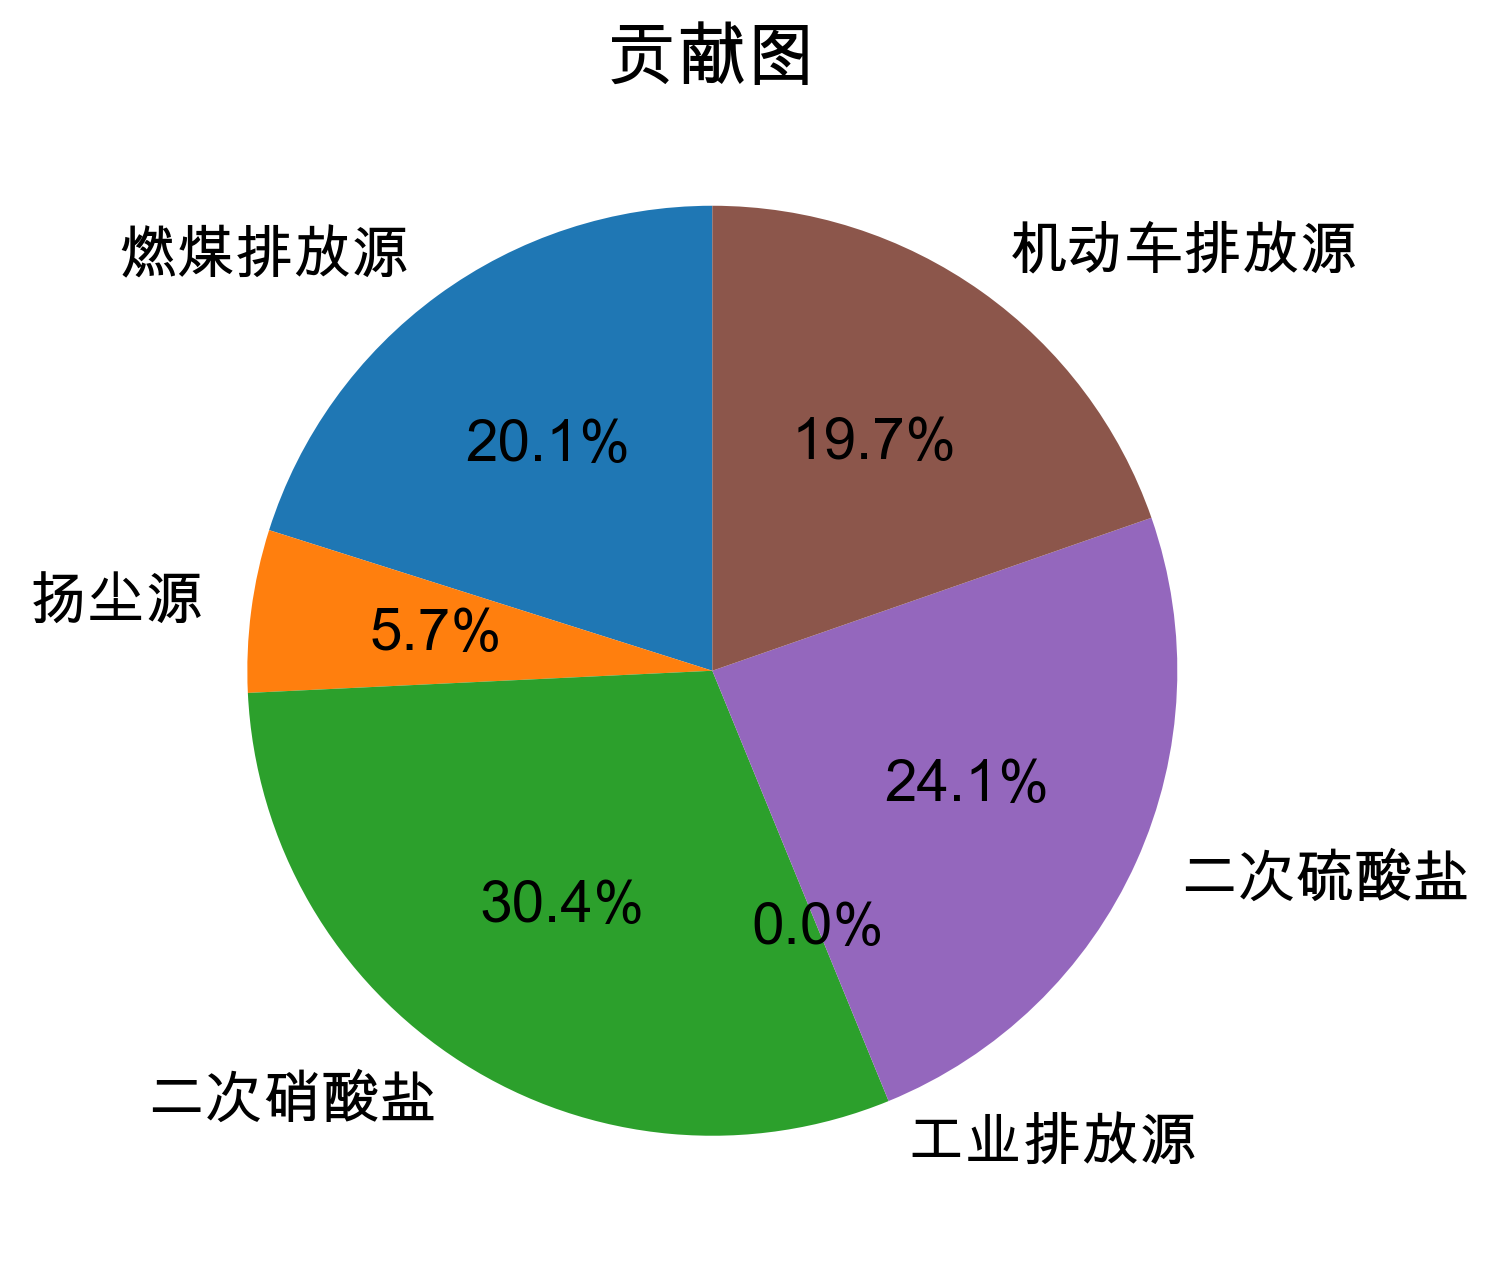

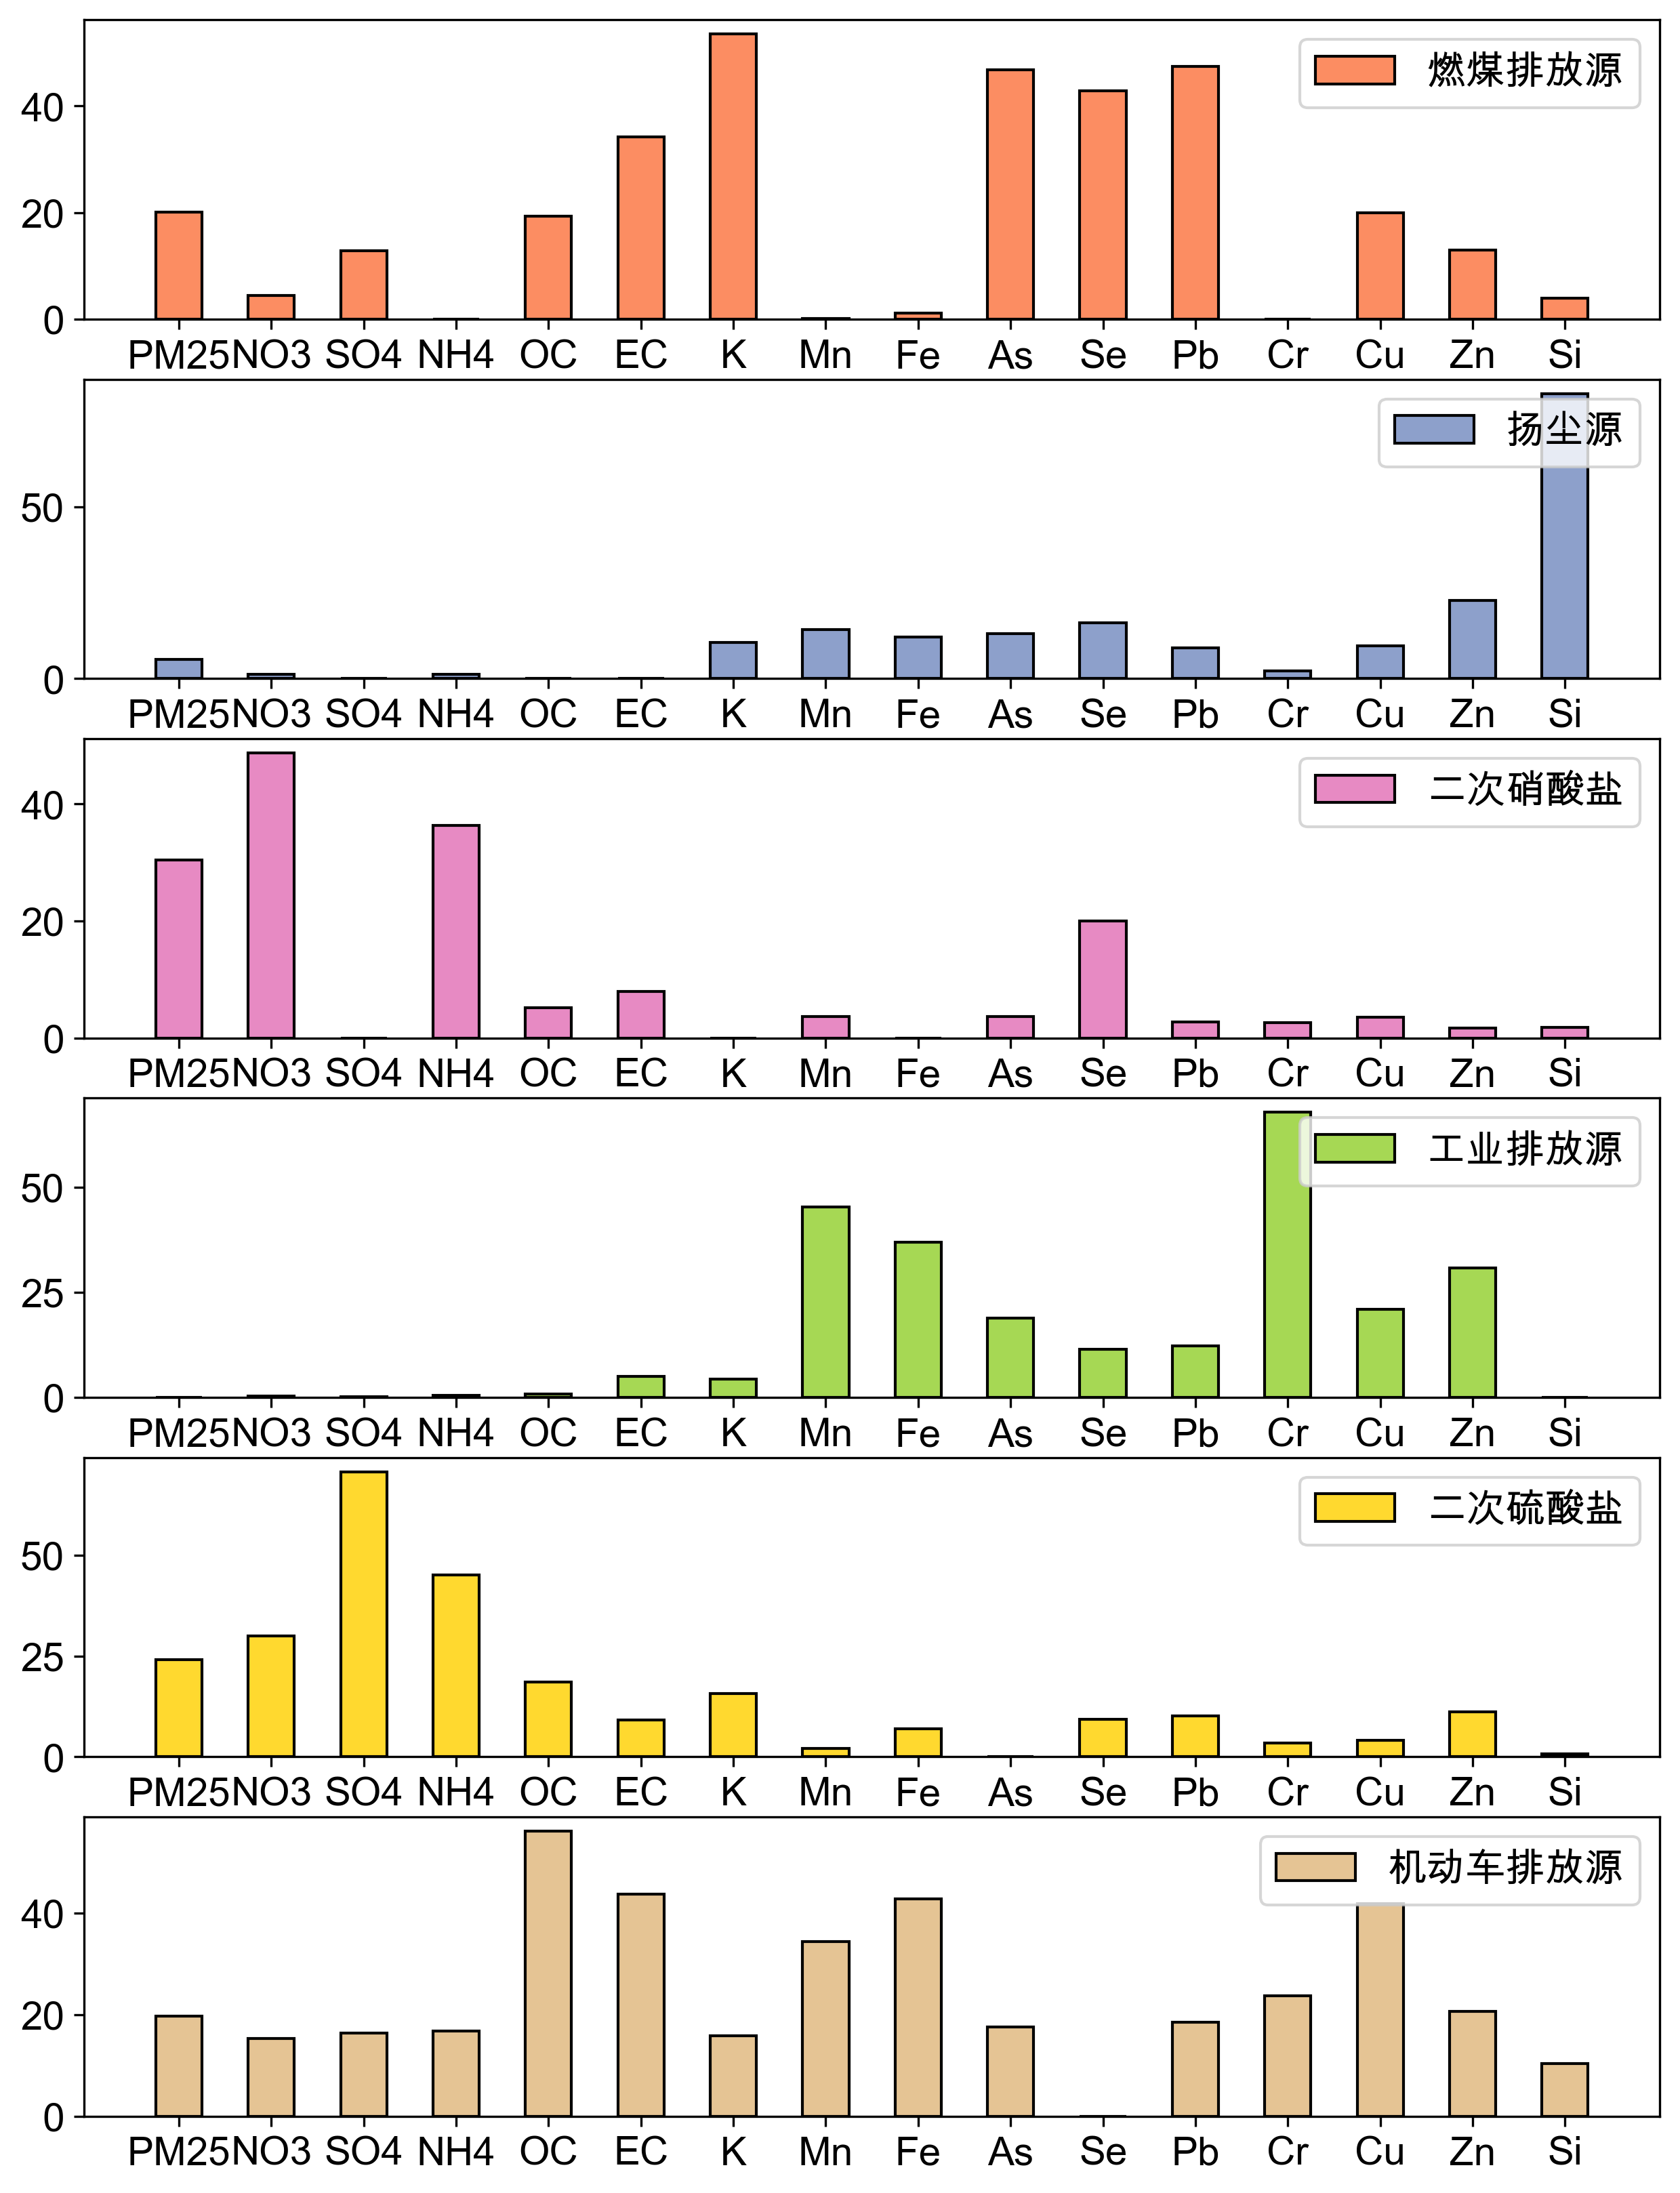

/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51080/1205079501.py:15: RuntimeWarning: invalid value encountered in true_divide
  percent = y / y.sum(axis=0).astype(float) * 100


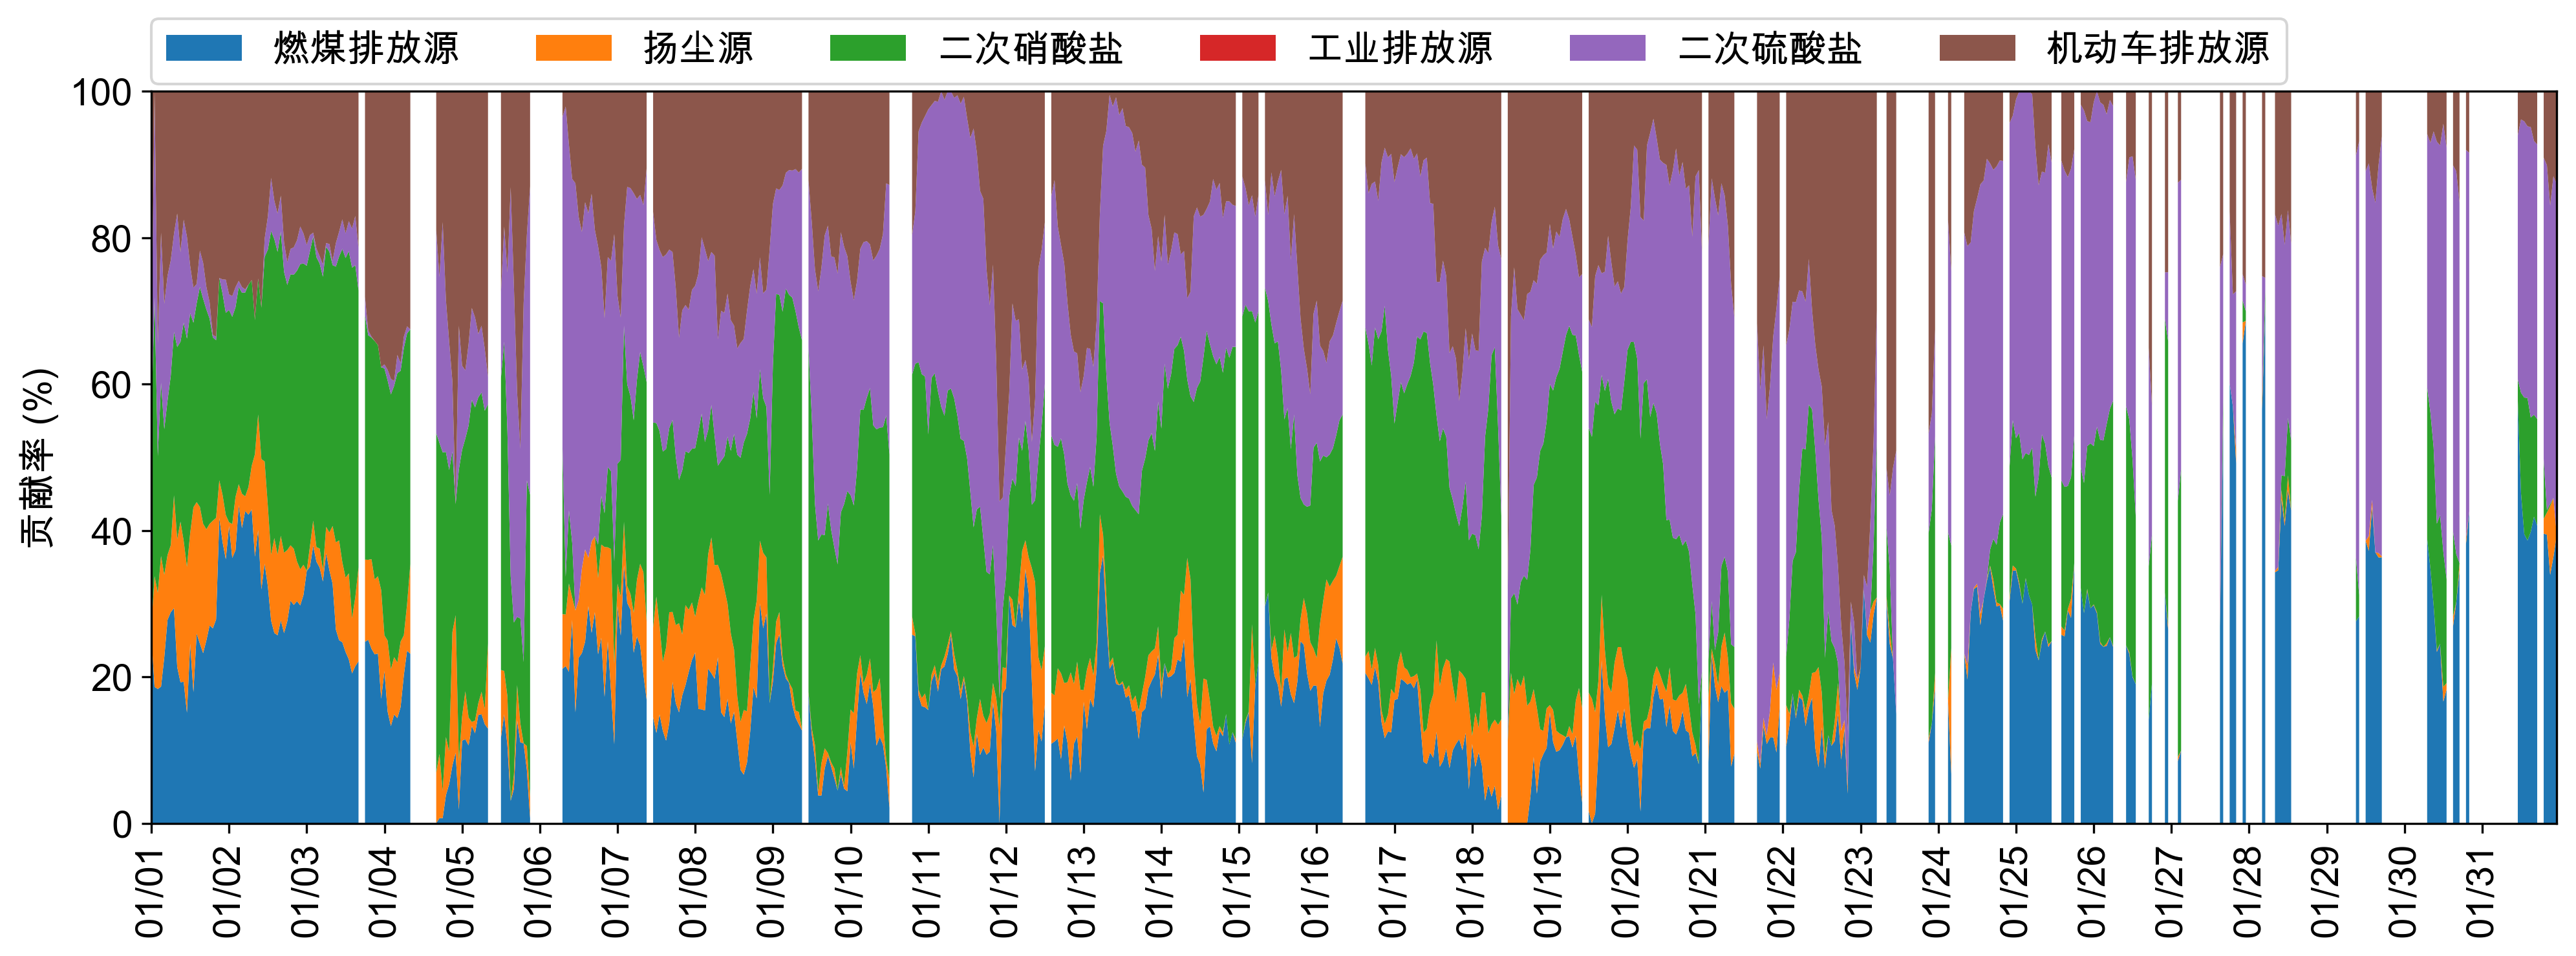

/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51080/4223843700.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dflower = df[df['PM25']<=75].drop(['PM25'], axis=1).sum()
/var/folders/lz/4fpzy07s1yz6z4cpnnch7r240000gn/T/ipykernel_51080/4223843700.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dfupper = df[df['PM25']>75].drop(['PM25'], axis=1).sum()


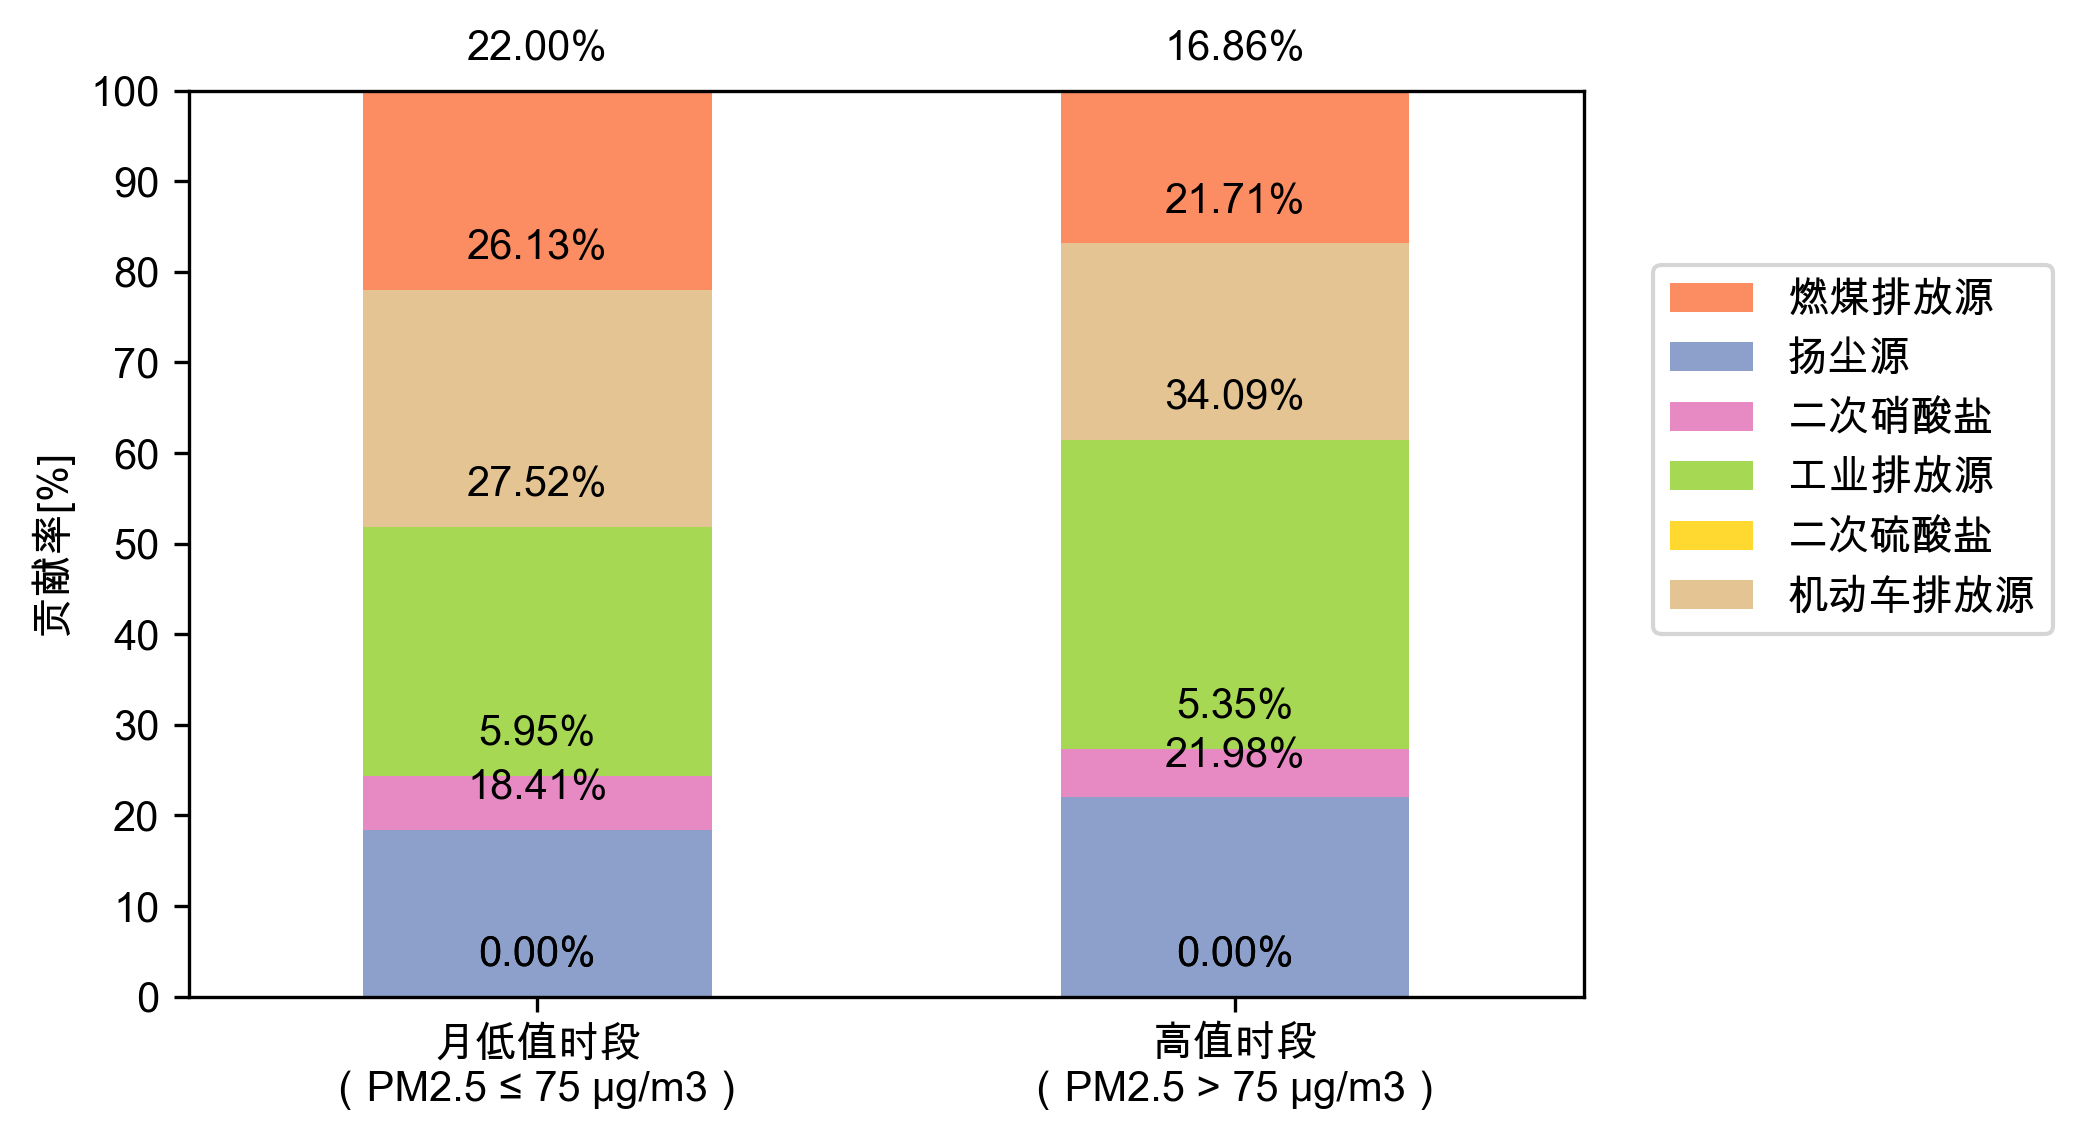

In [1784]:
df = pd.read_excel('./out_base.xlsx', sheet_name="贡献图")
contributionPicWithLegend(df, title="贡献图")
contributionPic(df, title="贡献图")


df = pd.read_excel('./out_base.xlsx', sheet_name="识别图")
analysisPic(df)


df = pd.read_excel('./out_base.xlsx', sheet_name="堆积图")
stackedAreaPic(df)

df = pd.read_excel('./out_base.xlsx', sheet_name="条型堆积图")
barStackedAreaPic(df)
